In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy import optimize


import mnist_reader 

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

#n = 30000
#np.random.seed(6333)
#ids = np.random.choice(range(60000),n,replace=False)
#X_train, y_train = X_train[ids], y_train[ids]



X_train = X_train.astype(np.float32)
X_train = X_train/(np.max(X_train))

n = X_train.shape[0]

classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

print(X_train.shape, y_train.shape, X_train.dtype)

n_neighbors= 15
n_components = 2
MIN_DIST = 0.1
    
%matplotlib notebook

%load_ext autoreload
%autoreload 2

float64
[5 0 4 ... 5 6 8]
(60000, 784) (60000,)


<IPython.core.display.Javascript object>


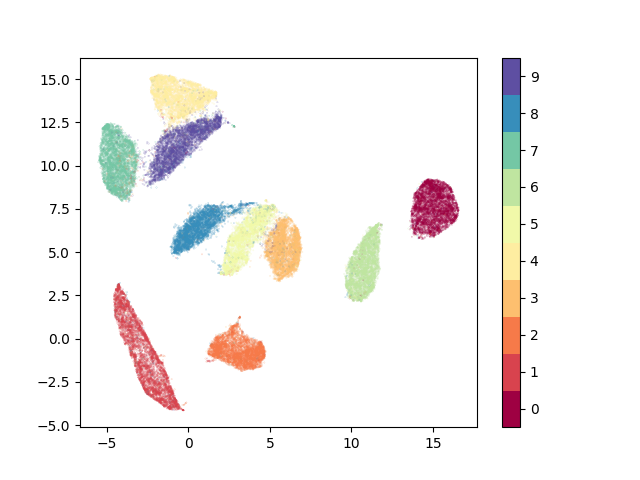

In [4]:
import umap

ump = umap.UMAP(n_neighbors=n_neighbors,
        min_dist=MIN_DIST,
        n_components=n_components,
        random_state=100,
        metric= 'euclidean')

y_umap_mapper = ump.fit(X_train)
y_umap = y_umap_mapper.embedding_

plt.figure()
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=0.01, cmap='Spectral')

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)


<IPython.core.display.Javascript object>


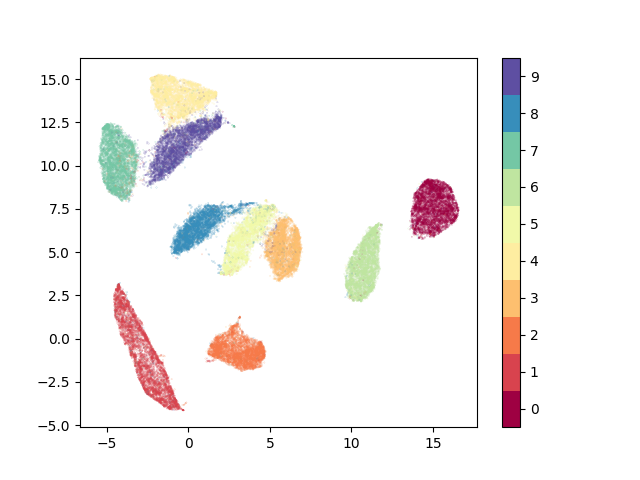

In [5]:
plt.figure()
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=0.01, cmap='Spectral')

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

In [6]:
np.random.seed(23423)

rand_perm = np.random.permutation(n)

X_train_rp = X_train[rand_perm]
y_train_rp = y_train[rand_perm]

nA = 10000
nB = 25000
nC = 25000

SETA = X_train_rp[:nA]
y_SETA = y_train_rp[:nA]
SETB = X_train_rp[nA:nA+nB]
y_SETB = y_train_rp[nA:nA+nB]
SETC = X_train_rp[nA+nB:nA+nB+nC]
y_SETC = y_train_rp[nA+nB:nA+nB+nC]

data1 = np.concatenate((SETA, SETB))
data2 = np.concatenate((SETA, SETC))

print(SETA.shape, SETB.shape, SETC.shape)

(10000, 784) (25000, 784) (25000, 784)


In [7]:
D1 = np.concatenate((SETA, SETB))
D2 = np.concatenate((SETA, SETC))

slices = [D1, D2]

relation_dict = {i:i for i in range(len(SETA))}
relation_dicts = [relation_dict]
#print(relation_dict)

In [8]:
np.random.seed(100)
aligned_mapper = umap.AlignedUMAP(random_state=42).fit(slices, relations=relation_dicts)

In [9]:
embA = aligned_mapper.embeddings_[0][0:10000]
embB = aligned_mapper.embeddings_[0][10000:]
embA_C = aligned_mapper.embeddings_[1][:10000]
embC = aligned_mapper.embeddings_[1][10000:]

<IPython.core.display.Javascript object>


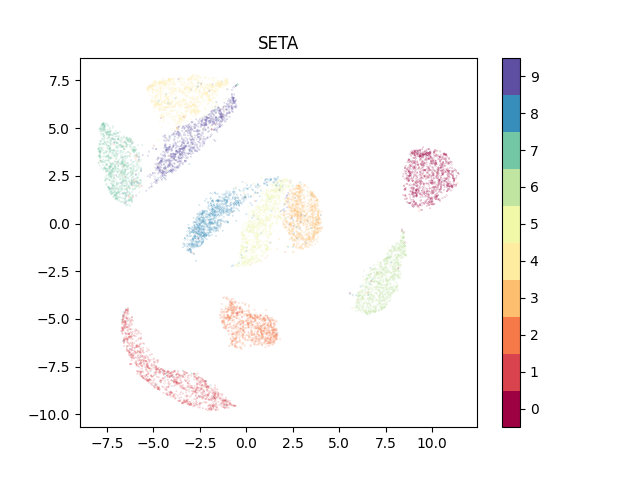

(10000, 2)


<IPython.core.display.Javascript object>


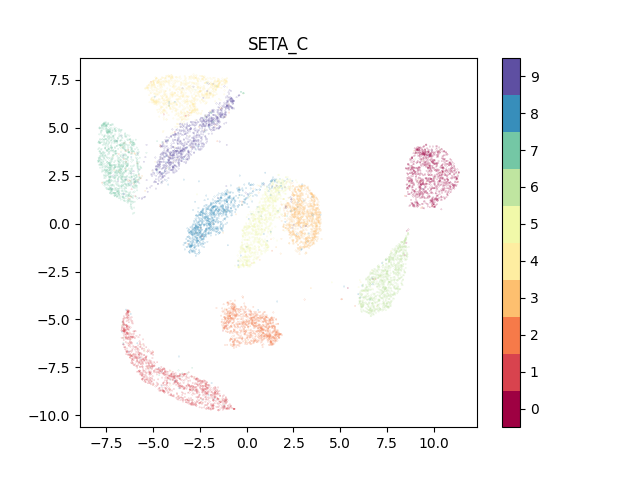

(25000, 2)


<IPython.core.display.Javascript object>


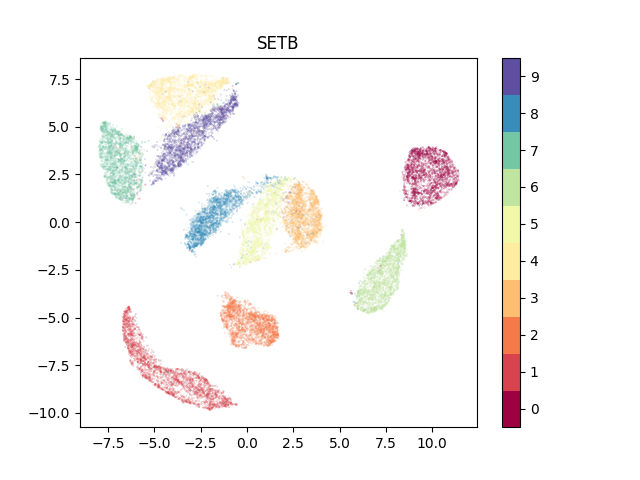

(25000, 2)


<IPython.core.display.Javascript object>


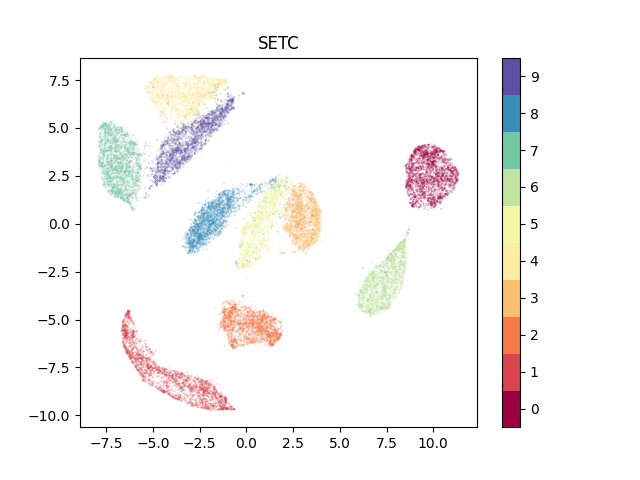

(25000, 2)


In [11]:
%matplotlib notebook

plt.figure()
plt.title('SETA')
print(embA.shape)
plt.scatter(embA[:,0], embA[:,1], c=y_SETA, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

plt.figure()
plt.title('SETA_C')
print(embB.shape)
plt.scatter(embA_C[:,0], embA_C[:,1], c=y_SETA, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)


plt.figure()
plt.title('SETB')
print(embB.shape)
plt.scatter(embB[:,0], embB[:,1], c=y_SETB, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

plt.figure()
plt.title('SETC')
print(embC.shape)
plt.scatter(embC[:,0], embC[:,1], c=y_SETC, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

